In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
T = 256
shift = 22.3
periods = np.array([T, T/2, T/3, T/4, T/5, T/6])
s = []
for p in periods:
    a = []
    for k in range(T):
        a.append( np.exp(1j*2*np.pi*(k+shift)/p))
    s.append(a)
s = np.array(s)

In [5]:
s.shape

(6, 256)

In [6]:
a = s[0]
a.shape

(256,)

In [7]:
b=s[1]

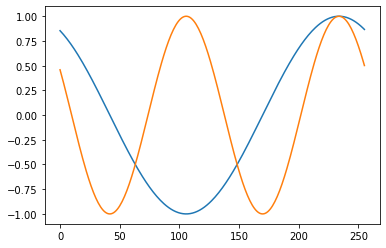

In [8]:
plt.plot(a.real)
plt.plot(b.real)

### The two signal vectors are orthogonal, independent of the amount of shift

In [9]:
d = a.dot(b)

In [10]:
d

(9.823319407171858e-15+3.300754863449361e-16j)

In [11]:
np.absolute(d)

9.828863311797814e-15

## complex inner products

In [12]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i]
        b = s[j]
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


## inner product of real parts

In [13]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i].real
        b = s[j].real
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


## inner product of imaginary parts

In [14]:
for i in range(len(periods)-1):
    for j in range(i+1, len(periods)):
        a = s[i].imag
        b = s[j].imag
        print ('dot ', i, j, np.round(np.absolute(a.dot(b)), 5))

dot  0 1 0.0
dot  0 2 0.0
dot  0 3 0.0
dot  0 4 0.0
dot  0 5 0.0
dot  1 2 0.0
dot  1 3 0.0
dot  1 4 0.0
dot  1 5 0.0
dot  2 3 0.0
dot  2 4 0.0
dot  2 5 0.0
dot  3 4 0.0
dot  3 5 0.0
dot  4 5 0.0


/home/yndk/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


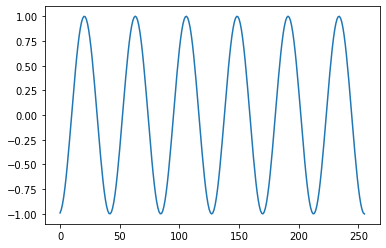

In [15]:
plt.plot(s[-1])

## DCT, JPEG, MPEG
- https://crynut84.tistory.com/61
- https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm

In [16]:
c = np.empty((8,8))

In [17]:
N = 8
for k in range(N):
    for n in range(N):
        if k == 0:
            c[k,n] = 1/np.sqrt(N)
        else:
            c[k,n] = np.sqrt(2/N) * np.cos( k * np.pi * (2*n+1) / (2*N) )

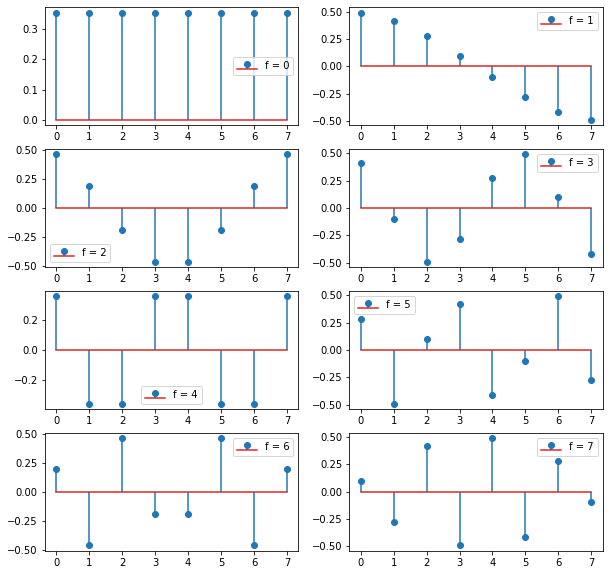

In [18]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
for i, ax in zip(range(N), axes.ravel()):
    x = np.arange (0, N, dtype=np.int)
    y = c[i]
#    y = np.hstack( (c[i], c[i][::-1]) )
    ax.stem (x, y, use_line_collection=True, label='f = {}'.format(i))
    ax.legend()
#    ax.set_xticks(x[::2])

## Orthogonality of DCT Matrix

In [19]:
print ('Note that c is an orthogonal matrix')
np.round(c @ c.T, decimals=5)

Note that c is an orthogonal matrix


array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  0., -0., -0.,  0.,  1.]])

## an image

In [20]:
X = np.random.random((8,8)) * 255

### DCT Apply!

In [21]:
V = c @ X @ c.T

In [22]:
V

array([[ 1.01070705e+03,  6.32368103e+01, -1.89491150e+01,
         5.50961123e+01,  2.89015596e+01,  8.06639501e+00,
         1.13129484e+02, -1.88077886e+01],
       [-5.74813633e+01, -4.25414391e+01,  7.81779685e+01,
        -1.52899713e+02, -6.75730579e+01,  1.46351491e+01,
        -3.58716442e+00, -8.92409711e+00],
       [-1.99400710e+01,  9.42184709e+00,  1.90083604e+00,
        -2.14366675e+01, -6.89588846e+01, -9.76896961e+01,
        -6.41454624e+01,  3.94867959e+00],
       [ 1.62312947e+02,  6.53892138e+01,  1.47101151e+00,
        -1.43058940e+02,  7.10291028e+01, -7.91554068e+01,
        -7.50612154e+01,  1.00128625e+02],
       [-1.08929591e+02, -1.03666674e+02, -4.37974876e+01,
         6.59253899e+01,  2.78992346e+01, -1.16756235e+02,
        -5.97201257e-01, -1.88383634e+01],
       [ 4.52575718e+01, -2.71602301e+00, -3.63558747e+01,
        -7.00976365e+01,  6.47724313e+01, -4.49428779e+01,
        -2.67422522e+01, -7.98340960e+01],
       [-1.09373135e+01,  4.755591

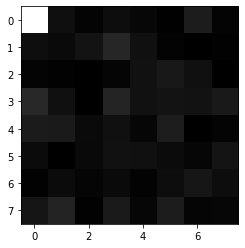

In [23]:
plt.imshow(np.fabs(V), cmap='gray')

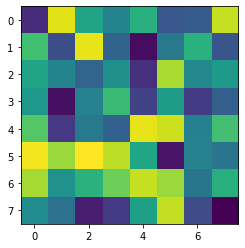

In [24]:
plt.imshow(X)

### Reconstruction: Inverse DCT

In [25]:
U = c.T @ V @ c

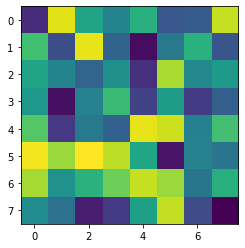

In [26]:
plt.imshow(U)

### reconstruction error

In [27]:
def PSNR(U, X):
    mse =  ((U-X)**2).sum() / (X.shape[0]*X.shape[1])**2
    psnr = 10*np.log10(255**2 / mse)
    print ('mse = ', mse, 'psnr = ', psnr)

In [28]:
PSNR(U, X)

mse =  1.7504666523563784e-28 psnr =  325.69926519309024


### quantization

In [29]:
vv = V.copy()
vv[4:,4:] = 0

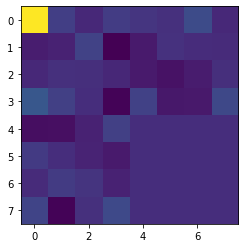

In [30]:
plt.imshow(vv)

In [31]:
uu = c.T @ vv @ c

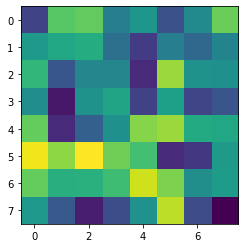

In [32]:
plt.imshow (uu)

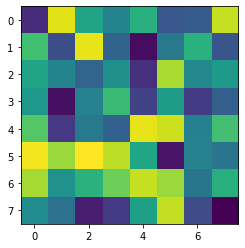

In [33]:
plt.imshow(X)

In [34]:
PSNR(uu, X)

mse =  13.889362574604565 psnr =  36.70398045777095


* 보통 30dB 가 넘으면 두 영상의 차이를 눈으로 구분하기 어려운 정도이다.
* 두 영상의 차이가 없다면 분모가 0이 되어서 PSNR은 매우 큰 값이 된다.
* 모든 영상을 대표하는 표준 시그널 파워가 없으므로 255의 제곱으로 시그널파워를 대신한다.

### Meaning of Reconstruction

In [35]:
U = c.T @ V @ c

In [60]:
b = c.T[:,0]
b = b.reshape(b.shape[0], 1) # column vector of c
b.shape
ii = b @ b.T
ii*255

array([[31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875],
       [31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875, 31.875]])

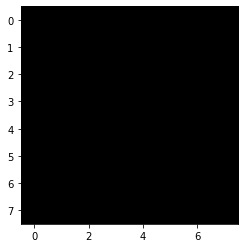

In [50]:
plt.imshow (ii*255, cmap='gray')

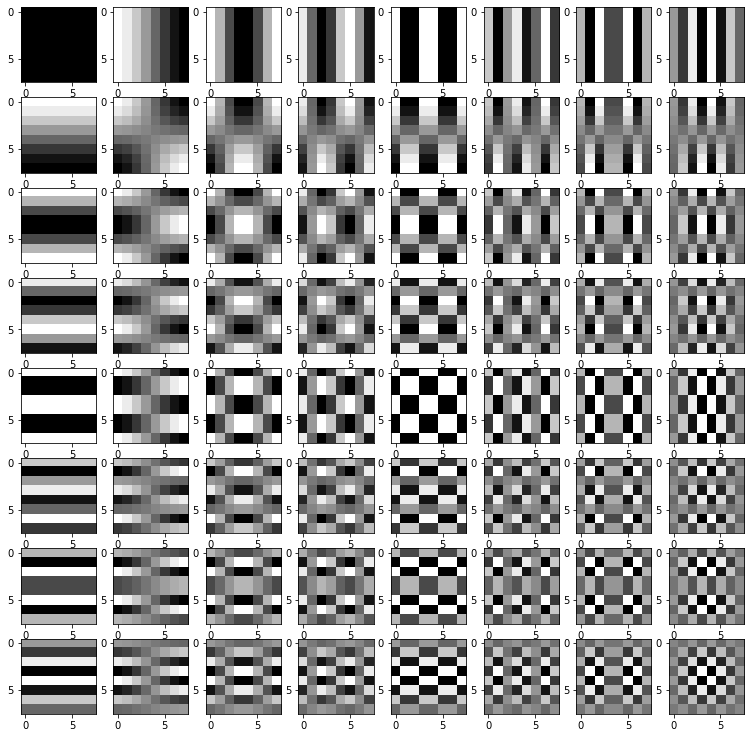

In [62]:
basis = np.empty((8,8,8,8))
for i in range(8):
    for j in range(8):
        # multiply i-th column of c.T with j-th row of c
        ith_col = c.T[:,i].reshape(8,1)
        jth_row = c[j,:].reshape(1,8)
        basis[i,j] = ith_col @ jth_row
    #
#
fig, axes = plt.subplots(8,8, figsize=(13,13))
for i in range(8):
    for j in range(8):
        axes[i][j].imshow (basis[i][j], cmap='gray')

### View as a linear sum

In [67]:
rec = np.zeros((8,8)) # the reconstructed image
for i in range(8):
    for j in range(8):
        wb = basis[i][j] * V[i,j]
        rec += wb
#
diff = rec - X
print (np.round(diff, 7))

[[-0.  0. -0.  0.  0. -0.  0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0.]
 [ 0. -0. -0.  0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0. -0.  0. -0.]
 [-0. -0.  0. -0. -0. -0.  0. -0.]
 [-0. -0. -0.  0. -0. -0. -0. -0.]
 [-0. -0. -0.  0.  0. -0.  0. -0.]
 [ 0. -0.  0.  0. -0. -0.  0. -0.]]


The decomposition, finding the DCT coefficients, can also be viewed as the inner product of the basis and the image.

In [72]:
ff = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        ff[i,j] = (X * basis[i,j]).sum()

In [76]:
np.round(ff - V, 7)

array([[ 0.,  0., -0.,  0.,  0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  0., -0.],
       [-0.,  0.,  0.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0., -0.,  0.,  0., -0.],
       [-0., -0.,  0., -0., -0., -0.,  0., -0.],
       [-0., -0., -0., -0., -0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  0.],
       [-0.,  0., -0., -0.,  0.,  0., -0.,  0.]])

## Using Simple Cosine Function

In [34]:
N = 8
N2 = N *2
coefs = []
for u in range(N):
    a = []
    if u == 0:
        for i in range(N): # time index
            a.append( 1 )
    else:
        period = N2 / u
        for i in range(N): # time index
            a.append( np.cos(2*np.pi*i / period) )
    coefs.append (a)
#
coefs = np.array(coefs)

In [35]:
coefs

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  9.23879533e-01,  7.07106781e-01,
         3.82683432e-01,  6.12323400e-17, -3.82683432e-01,
        -7.07106781e-01, -9.23879533e-01],
       [ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -1.83697020e-16,  7.07106781e-01],
       [ 1.00000000e+00,  3.82683432e-01, -7.07106781e-01,
        -9.23879533e-01, -1.83697020e-16,  9.23879533e-01,
         7.07106781e-01, -3.82683432e-01],
       [ 1.00000000e+00,  6.12323400e-17, -1.00000000e+00,
        -1.83697020e-16,  1.00000000e+00,  3.06161700e-16,
        -1.00000000e+00, -4.28626380e-16],
       [ 1.00000000e+00, -3.82683432e-01, -7.07106781e-01,
         9.23879533e-01,  3.06161700e-16, -9.23879533e-01,
         7.07106781e-01,  3.82683432e-01],
       [ 1.00000000e+00, -7.071067

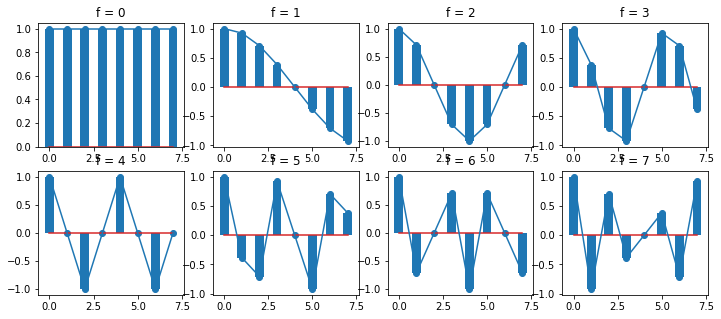

In [36]:
xaxis = np.arange(N)
fig, axes = plt.subplots(2,4, figsize=(12,5))
for i, ax in zip(range(N), axes.ravel()):
    ax.stem(xaxis, coefs[i], use_line_collection=True)
    ax.bar(xaxis, coefs[i], width=.5)
    ax.set_title ('f = {}'.format(i))
    ax.plot(xaxis, coefs[i])

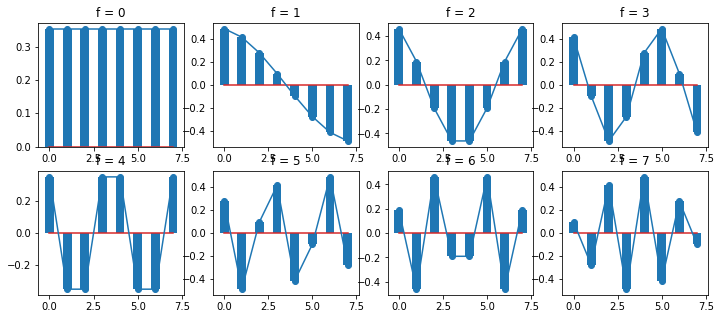

In [37]:
xaxis = np.arange(N)
fig, axes = plt.subplots(2,4, figsize=(12,5))
for i, ax in zip(range(N), axes.ravel()):
    ax.stem(xaxis, c[i], use_line_collection=True)
    ax.bar(xaxis, c[i], width=.5)
    ax.set_title ('f = {}'.format(i))
    ax.plot(xaxis, c[i])

In [38]:
def pltsig(sig):
    xaxis = np.arange(N)
    fig, axes = plt.subplots(2,4, figsize=(12,5))
    for i, ax in zip(range(N), axes.ravel()):
        ax.stem(xaxis, sig[i], use_line_collection=True)
        ax.bar(xaxis, sig[i], width=.5)
        ax.set_title ('f = {}'.format(i))
        ax.plot(xaxis, sig[i])

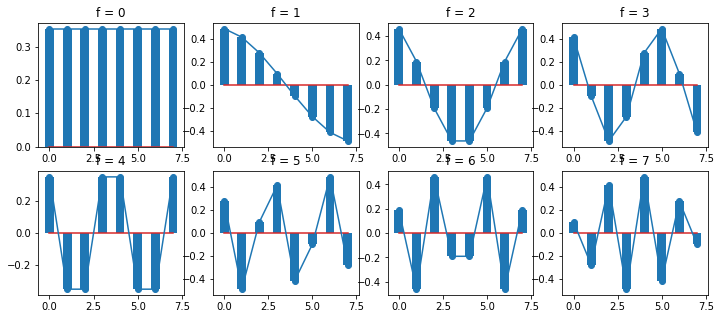

In [39]:
pltsig(c)

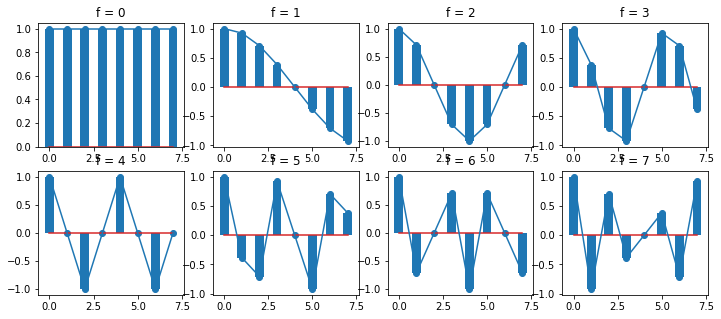

In [40]:
pltsig(coefs)

### Cosine coefficient for DCT
- double period
- half pixel shift

In [41]:
coefs2 = []
for u in range(N):
    a = []
    if u == 0:
        for i in range(N): # time index
            a.append( 1 )
    else:
        period = N2 / u
        for i in range(N): # time index
            a.append( np.cos(2*np.pi*(i+.5) / period) )
    coefs2.append (a)
#
coefs2 = np.array(coefs2)

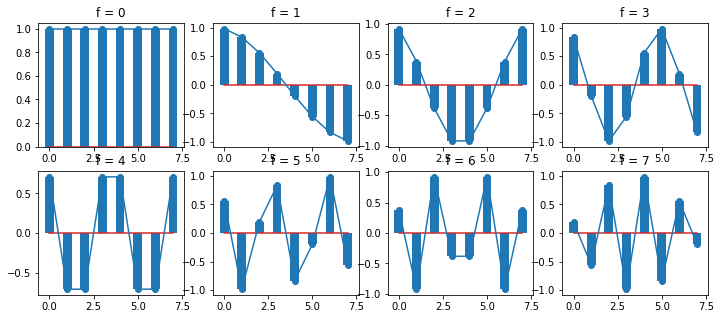

In [42]:
pltsig(coefs2)

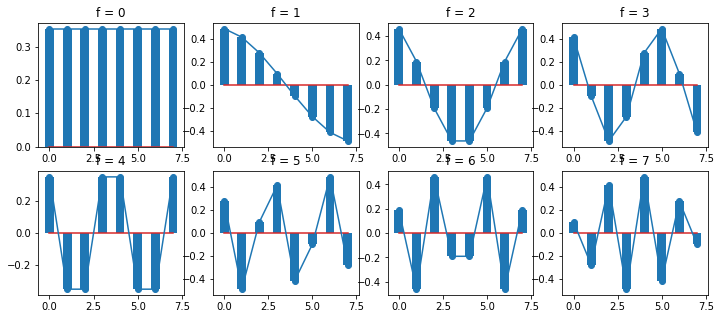

In [43]:
pltsig(c)

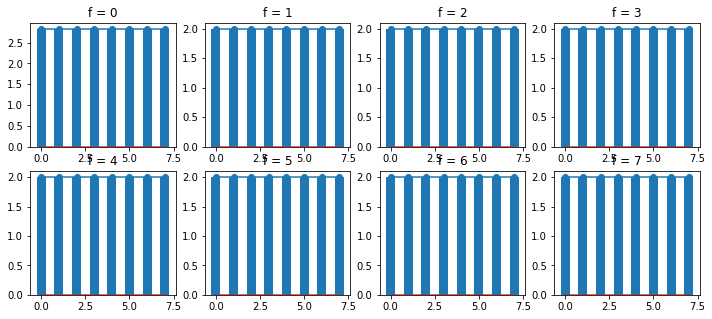

In [44]:
pltsig(coefs2/c)

## Exercise
1. load an image
2. for each 8x8 block of the image, apply DCT using the matrix formulation
3. use only DC term and reconstruct + visual inspection
4. use half of the coefficients and reconstruct
    - how to choose half of them?
        1. vertically half
        2. horizontally half
        3. diagnoaly half (zig-zag)

# DCT of a whole image

In [45]:
def getDCTMatrix(N):
    # N = 8
    c = np.empty( (N,N) )
    for k in range(N):
        for n in range(N):
            if k == 0:
                c[k,n] = 1/np.sqrt(N)
            else:
                c[k,n] = np.sqrt(2/N) * np.cos( k * np.pi * (2*n+1) / (2*N) )
    return c
#

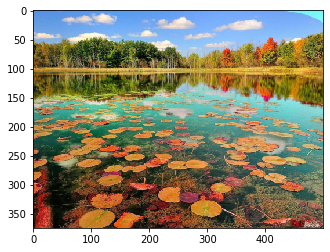

In [46]:
import imageio
Img = imageio.imread ('python/data/nature-500x375.jpg')
Img.shape
plt.imshow (Img, cmap='gray')

### For simplicity, make a square image

In [47]:
w = 128
I = Img[50:50+w, :w, 1]
I.shape

(128, 128)

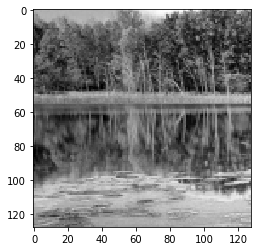

In [48]:
plt.imshow (I, cmap='gray')

In [49]:
N = I.shape[1]
coefmat = getDCTMatrix (N)

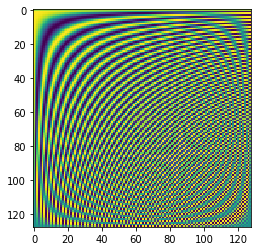

In [50]:
plt.imshow(coefmat)

In [51]:
im_dct = coefmat @ I @ coefmat.T

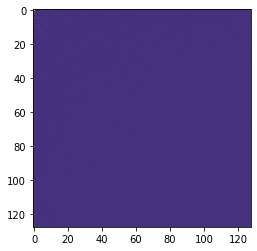

In [52]:
plt.imshow (im_dct)

In [53]:
im_dct

array([[ 1.48893281e+04, -2.78433203e+02, -7.39177133e+02, ...,
        -2.05732945e+01, -6.97046822e+00, -5.76702340e+00],
       [-2.45904170e+03,  8.86668118e+02, -2.51541198e+02, ...,
         8.05294215e+00, -1.00767730e+01, -5.33329011e+00],
       [ 2.44877448e+03,  4.96670878e+02, -1.42812488e+01, ...,
         1.26303201e+01,  6.06549741e+00,  2.22923096e+00],
       ...,
       [ 2.48022944e+01, -4.71622077e+00, -4.07432094e+01, ...,
        -4.53697702e+00,  2.05455071e+00,  4.66443164e-01],
       [-5.68163642e+00,  9.23751484e+00,  3.98449366e+01, ...,
         1.55107486e+00,  4.30537652e+00, -1.58681035e-01],
       [-4.79040936e+01,  3.18035089e+01, -7.43515650e+00, ...,
        -3.16781335e+00,  5.62757055e+00,  2.57048187e+00]])

In [54]:
def normalize (im):
    Max = im.max()
    Min = im.min()
    im_normalized = (im - Min)/ (Max - Min)
    return im_normalized

In [55]:
im0 = normalize (im_dct)

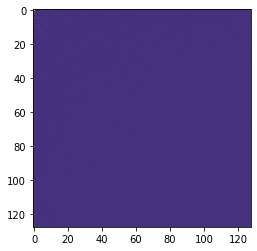

In [56]:
plt.imshow ( im0 )

In [57]:
im1 = normalize (np.log10(np.fabs(im_dct)))

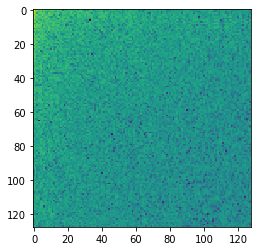

In [58]:
plt.imshow (im1)

In [59]:
im1

array([[1.        , 0.75056766, 0.81176948, ..., 0.58726507, 0.51942179,
        0.50754157],
       [0.88711462, 0.82317372, 0.74420079, ..., 0.5284705 , 0.5425239 ,
        0.50264048],
       [0.88685235, 0.78684581, 0.56438261, ..., 0.5566821 , 0.51070462,
        0.44796076],
       ...,
       [0.59898331, 0.49493286, 0.63009655, ..., 0.49250406, 0.4428458 ,
        0.34990617],
       [0.50660654, 0.53707292, 0.62869909, ..., 0.42522484, 0.48921966,
        0.28231809],
       [0.64024578, 0.61456901, 0.52346722, ..., 0.46998686, 0.50600719,
        0.45688922]])

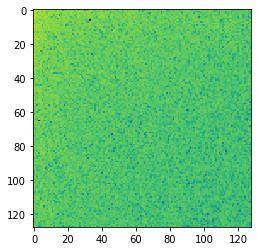

In [60]:
im2 = np.power (im1, 0.5)
plt.imshow (im2)

### reconstruction

In [61]:
rec0 = coefmat.T @ im_dct @ coefmat

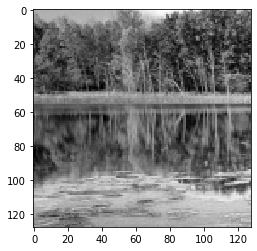

In [62]:
plt.imshow (rec0, cmap='gray')

In [63]:
imdct2 = im_dct.copy()
for i in range (imdct2.shape[0]):
    imdct2[i, imdct2.shape[1] - 1 -i:] = 0


In [64]:
rec2 = coefmat.T @ imdct2 @ coefmat

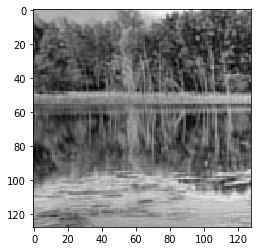

In [65]:
plt.imshow (rec2, cmap='gray')

In [66]:
imdct3 = im_dct.copy()
imdct3[64:0, 64:0] = 0

In [67]:
rec3 = coefmat.T @ imdct3 @ coefmat

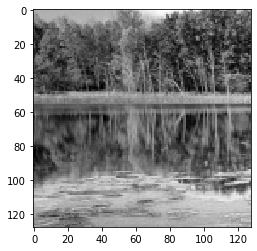

In [68]:
plt.imshow (rec3, cmap='gray')

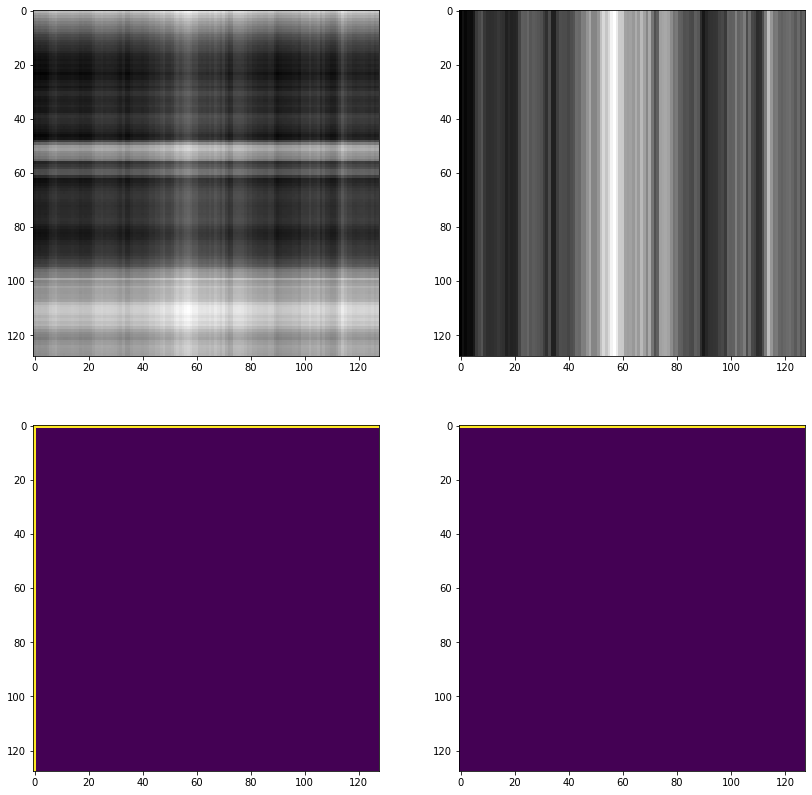

In [69]:
imdct4 = im_dct.copy()
imdct42 = im_dct.copy()
#
s = 1
#
imdct4[s:, s:] = 0
rec4 = coefmat.T @ imdct4 @ coefmat
#
imdct42[s:, :] = 0
rec42 = coefmat.T @ imdct42 @ coefmat
#
fig, axes = plt.subplots(2,2, figsize=(14,14))
axes[0,0].imshow (rec4, cmap='gray')
axes[0,1].imshow (rec42, cmap='gray')
axes[1,0].imshow (imdct4 != 0)
axes[1,1].imshow (imdct42 != 0)

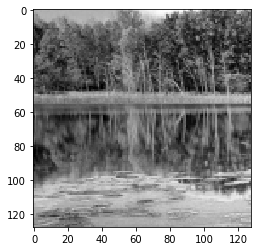

In [70]:
plt.imshow (I, cmap='gray')

# Wht is this?

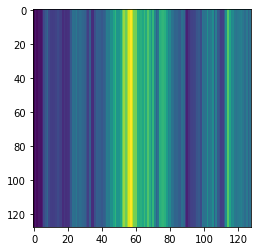

In [71]:
plt.imshow(rec42)

## Forward DCT

This is the reconstruction of the first row of DCT Image. Then how is the first row of DCT image is constructed?

$$
F = C  X  C^T 
$$

Let's first think of $ g = X C^T$.
- The first row of $g$ is given by $ g[0, i] = X[0,:] \cdot C[i, :]$
    - that is, $g[0,i]$ is the inner product of $X[0,:]$ and $C[i, :]$ for each $i$.
        - so, $g[0,0]$ is the sum of $X[0,:]$, the first row of X. (zeroth harmonic)
            - Just think of $X[0,:]$ as a 1D signal/array $x = X[0,:]$ 
        - $g[0,1]$ is the inner product of $x$ and $C[1,:]$. (first harmonic)
        - $g[0,2]$ is the inner product of $x$ and $C[2,:]$. (second harmonic)
        - and so on
- Therefore, $g[k,i]$ is the inner product of $X[k,:]$ and $C[i,:]$.
- This can be summerized as the matrix multiplication of $X$ and $C^T$: 
    $$g = X C^T$$

From $F=C g$, let's think ...
- $F[0,k] = C[0,:] \cdot g[:,k]$:
    - the inner product of the zeroth row of $C$ and the $k$th column of $g$.
- What is the meaning of $C[0,:] \cdot v$ for a vector $v$? 
    - it means the sum of every thing in $v$ (or average)
- So, $F[0,0]$ is the sum of all the $g[:,0]$.
    - $g[:,0]$ is a vector of sums of the rows of the input $X$.
    - and $F[0,0]$ is the sum of sum of rows
    - so it is total sum of $X$.
- Likewise, $F[0,1]$ is the sum of all the components in $g[:,1]$
    - which is the sum of the first harmonics along the $x$-axis.

## Inverse DCT

$$
 Y = C^T F C
$$
Denote $C$ using a stacked row vectors
$$
C = [c_0; c_1; ...; c_7]
$$ where $c_k, k=0,...,7$ is a row vector. 

Then The reconstructed image $Y$ can be written as
$$
Y = \sum_{ij} F_{ij} c_i^T c_j
$$
We may take $c_i^T c_j$ as a basis image and think that $Y$ is a linear combination of 64 basis images $b_{ij} = c_i^T c_j$.
- Note that $b_{ij}$ is a $8\times8$ matrix

## Exercise
1. compute all the 8x8 basis images for JPEG. In total there are 64 basis images.
2. For the 128x128 image, you have 128 basis rows, the DCT image has 128x128 coefficients, and therefore has 128x128 basis images. Find and display a few of them.
3. You can do this with $sin(x)$ function. Apply it for 8x8 image block and show the basis images.
4. You can also do this with $e^{jx} = cos(x) + j sin(x)$, complex exponential, where $j = \sqrt{-1}$. This is called the **Discrete Fourier Transform**.
5. You can do this with any set of orthogonal basis vectors, which leads to the **Wavelet Transforms**. Find one in www.wikipedia.org, and provide a brief explanation.

# END